# Import

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle


from collections import Counter

## model training 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

## matrics
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score,recall_score,precision_score

In [22]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [23]:
%cd '/content/drive/MyDrive/Dsa4266/betterdata'

/content/drive/.shortcut-targets-by-id/1P9I9Q_qvMPkz0JQTdk9nii6jNIQjzP75/betterdata


# Pre-processing

## Real Data

In [ ]:
real_data = pd.read_csv('Datasets/Real/target.csv', low_memory = False)
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445827 entries, 0 to 445826
Data columns (total 78 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Year                  445827 non-null  int64  
 1   Quarter               445827 non-null  int64  
 2   Month                 445827 non-null  int64  
 3   DayofMonth            445827 non-null  int64  
 4   DayOfWeek             445827 non-null  int64  
 5   FlightDate            445827 non-null  object 
 6   AirlineID             445827 non-null  int64  
 7   Carrier               445827 non-null  object 
 8   TailNum               441583 non-null  object 
 9   FlightNum             445827 non-null  int64  
 10  OriginAirportID       445827 non-null  int64  
 11  OriginAirportSeqID    445827 non-null  int64  
 12  OriginCityMarketID    445827 non-null  int64  
 13  Origin                445827 non-null  object 
 14  OriginState           445827 non-null  object 
 15  

In [ ]:
real_data['Cancelled'].value_counts()

0    434162
1     11665
Name: Cancelled, dtype: int64

In [ ]:
#columns to be drop : 'Year','Quarter','Month','FlightDate','TailNum','FlightNum','AirlineID','Carrier','DepTime','TaxiOut','WheelOff',
#'WheelsOn','TaxiIn','ArrTime','ArrDelay','ArrDelayMinutes','ArrDel15','ArrivalDelayGroups','ActualElapsedTime','AirTime','Flight',
#'CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','FirstDepTime','TotalAddGTime','LongestAddGTime',
#'DivAirportLandings','DivReachedDest','DivActualElapsedTime','DivArrDelay','DivDistance','Div1Airport','Div1AirportID','Div1AirportSeqID',
#'Div1WheelsOn','Div1TotalGTime','Div1LongestGTime','Div1WheelsOff','Div1TailNum','Div2Airport','Div2AirportID','Div2AirportSeqID',
#'Div2WheelsOn','Div2TotalGTime','Div2LongestGTime'

# drop all row with Nan for 'ArrDel15'
# drop 'Cancelled','CancellationCode' after dropping rows that are cancelled.
# drop 'Diverted' and related column

#target column 'ArrDel15'

x_real = real_data[(real_data['Cancelled'] == 0)]
x_real = x_real.drop(['Cancelled','CancellationCode'], axis = 1) 
x_real = x_real.dropna(subset=['ArrDel15'])


y_real = x_real['ArrDel15']
x_real = x_real.drop(['Year','Quarter','Month','FlightDate','TailNum','FlightNum','AirlineID','Carrier','DepTime','TaxiOut','WheelsOff',
                      'WheelsOn','TaxiIn','ArrTime','ArrDelay','ArrDelayMinutes','ArrDel15','ArrivalDelayGroups','ActualElapsedTime','AirTime','Flights',
                      'CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','FirstDepTime','TotalAddGTime','LongestAddGTime',
                      'DivAirportLandings','DivReachedDest','DivActualElapsedTime','DivArrDelay','DivDistance','Div1Airport','Div1AirportID','Div1AirportSeqID',
                      'Div1WheelsOn','Div1TotalGTime','Div1LongestGTime','Div1WheelsOff','Div1TailNum','Div2Airport','Div2AirportID','Div2AirportSeqID',
                      'Div2WheelsOn','Div2TotalGTime','Div2LongestGTime','Diverted'],
                      axis = 1)



In [ ]:
# One-Hot encoding
x_real = pd.get_dummies(x_real,columns = ['Origin','OriginState','Dest','DestState','DepTimeBlk','ArrTimeBlk'])

In [ ]:
#train test split
x_train, x_val, y_train, y_val = train_test_split(x_real, y_real, test_size = 0.2, random_state = 4266, stratify = y_real) 

In [ ]:
#get columns in one-hot encoded data
cols = x_real.columns.tolist()

In [ ]:
#save x_real column
filename = 'Save State/x_real.pkl'
pickle.dump(cols, open(filename, 'wb'))

In [ ]:
#save x_val column
filename = 'Save State/x_val.pkl'
pickle.dump(x_val, open(filename, 'wb'))

#save y_val column
filename = 'Save State/y_val.pkl'
pickle.dump(y_val, open(filename, 'wb'))

Class=0, n=72484 (83.642%)
Class=1, n=14176 (16.358%)


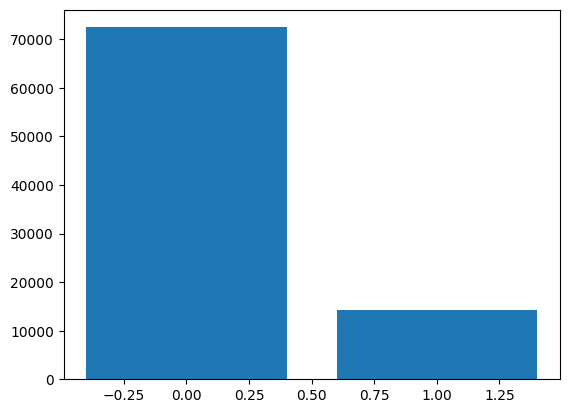

In [ ]:
counter = Counter(y_val)
for k,v in counter.items():
 per = v / len(y_val) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

Class=0, n=289932 (83.641%)
Class=1, n=56706 (16.359%)


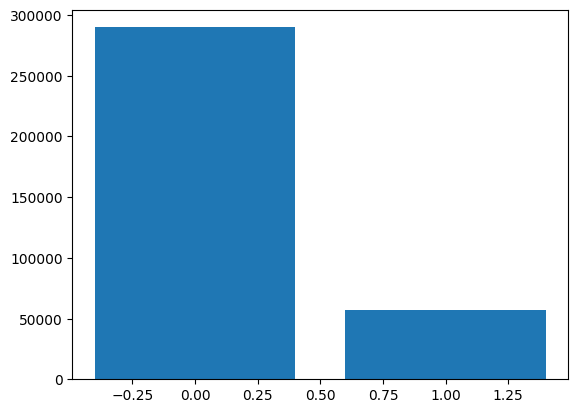

In [ ]:
counter = Counter(y_train)
for k,v in counter.items():
 per = v / len(y_train) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

## copula

### base

In [24]:
cop_data = pd.read_csv('Datasets/Synthetic/target_copula_base (1).csv', low_memory = False)

In [27]:
cop_data['ArrDel15'].value_counts()

0.0    664664
1.0    223625
Name: ArrDel15, dtype: int64

In [28]:
x_cop = cop_data[(cop_data['Cancelled'] == 0)]
x_cop = x_cop.drop(['Cancelled','CancellationCode'], axis = 1) 
x_cop = x_cop.dropna(subset=['ArrDel15'])
x_cop = x_cop.dropna(subset=['DepDelay'])

y_cop = x_cop['ArrDel15']
x_cop = x_cop.drop(['Year','Quarter','Month','FlightDate','TailNum','FlightNum','AirlineID','Carrier','DepTime','TaxiOut','WheelsOff',
                         'WheelsOn','TaxiIn','ArrTime','ArrDelay','ArrDelayMinutes','ArrDel15','ArrivalDelayGroups','ActualElapsedTime','AirTime','Flights',
                         'CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','FirstDepTime','TotalAddGTime','LongestAddGTime',
                         'DivAirportLandings','DivReachedDest','DivActualElapsedTime','DivArrDelay','DivDistance','Div1Airport','Div1AirportID','Div1AirportSeqID',
                         'Div1WheelsOn','Div1TotalGTime','Div1LongestGTime','Div1WheelsOff','Div1TailNum','Div2Airport','Div2AirportID','Div2AirportSeqID',
                         'Div2WheelsOn','Div2TotalGTime','Div2LongestGTime','Diverted'],
                        axis = 1)

In [29]:
x_cop = pd.get_dummies(x_cop,columns = ['Origin','OriginState','Dest','DestState','DepTimeBlk','ArrTimeBlk'])

In [30]:
#load x_real columns
filename = 'Save State/x_real.pkl'
cols = pickle.load(open(filename, 'rb'))

In [31]:
#add columns in real val data that are not in synthetic data
for i in cols:
  if i not in x_cop.columns:
    x_cop[i] = 0

x_cop = x_cop[cols]

In [32]:
x_cop.shape

(887637, 751)

### beta clean

In [ ]:
cop_data = pd.read_csv('Datasets/Synthetic/target_copula_beta.csv', low_memory = False)

In [ ]:
cop_data = cop_data.round({'ArrDel15': 0})

In [ ]:
cop_data['ArrDel15'].value_counts()

0.0    816033
1.0    155416
Name: ArrDel15, dtype: int64

In [ ]:
x_cop = cop_data.dropna(subset=['ArrDel15'])
x_cop = x_cop.dropna(subset=['DepDelay'])

y_cop = x_cop['ArrDel15']
x_cop = x_cop.drop(['Year','Quarter','Month','FlightDate','TailNum','FlightNum','AirlineID','Carrier','DepTime','TaxiOut','WheelsOff',
                         'WheelsOn','TaxiIn','ArrTime','ArrDelay','ArrDelayMinutes','ArrDel15','ArrivalDelayGroups','ActualElapsedTime','AirTime'
                         ],
                        axis = 1)

In [ ]:
x_cop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 971449 entries, 0 to 999999
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   DayofMonth            971449 non-null  int64  
 1   DayOfWeek             971449 non-null  int64  
 2   OriginAirportID       971449 non-null  int64  
 3   OriginAirportSeqID    971449 non-null  int64  
 4   OriginCityMarketID    971449 non-null  int64  
 5   Origin                971449 non-null  object 
 6   OriginState           971449 non-null  object 
 7   OriginStateFips       971449 non-null  int64  
 8   OriginWac             971449 non-null  int64  
 9   DestAirportID         971449 non-null  int64  
 10  DestAirportSeqID      971449 non-null  int64  
 11  DestCityMarketID      971449 non-null  int64  
 12  Dest                  971449 non-null  object 
 13  DestState             971449 non-null  object 
 14  DestStateFips         971449 non-null  int64  
 15  

In [ ]:
x_cop = pd.get_dummies(x_cop,columns = ['Origin','OriginState','Dest','DestState','DepTimeBlk','ArrTimeBlk'])

In [ ]:
#load x_real columns
filename = 'Save State/x_real.pkl'
cols = pickle.load(open(filename, 'rb'))

In [ ]:
#add columns in real val data that are not in synthetic data
for i in cols:
  if i not in x_cop.columns:
    x_cop[i] = 0

x_cop = x_cop[cols]

In [ ]:
x_cop.shape

(971449, 751)

## CTGAN

### base

In [ ]:
gan_data = pd.read_csv('Datasets/Synthetic/target_gan_base.csv', low_memory = False)

In [ ]:
gan_data['ArrDel15'].value_counts()

0.0    826392
1.0    145057
Name: ArrDel15, dtype: int64

In [ ]:
x_gan = gan_data[(gan_data['Cancelled'] == 0)]
x_gan = x_gan.drop(['Cancelled','CancellationCode'], axis = 1) 
x_gan = x_gan.dropna(subset=['ArrDel15'])
x_gan = x_gan.dropna(subset=['DepDelay'])

y_gan = x_gan['ArrDel15']
x_gan = x_gan.drop(['Year','Quarter','Month','FlightDate','TailNum','FlightNum','AirlineID','Carrier','DepTime','TaxiOut','WheelsOff',
                         'WheelsOn','TaxiIn','ArrTime','ArrDelay','ArrDelayMinutes','ArrDel15','ArrivalDelayGroups','ActualElapsedTime','AirTime','Flights',
                         'CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','FirstDepTime','TotalAddGTime','LongestAddGTime',
                         'DivAirportLandings','DivReachedDest','DivActualElapsedTime','DivArrDelay','DivDistance','Div1Airport','Div1AirportID','Div1AirportSeqID',
                         'Div1WheelsOn','Div1TotalGTime','Div1LongestGTime','Div1WheelsOff','Div1TailNum','Div2Airport','Div2AirportID','Div2AirportSeqID',
                         'Div2WheelsOn','Div2TotalGTime','Div2LongestGTime','Diverted'],
                        axis = 1)

In [ ]:
x_gan = pd.get_dummies(x_gan,columns = ['Origin','OriginState','Dest','DestState','DepTimeBlk','ArrTimeBlk'])

In [ ]:
#load x_real columns
filename = 'Save State/x_real.pkl'
cols = pickle.load(open(filename, 'rb'))

In [ ]:
#add columns in real val data that are not in synthetic data
for i in cols:
  if i not in x_gan.columns:
    x_gan[i] = 0

x_gan = x_gan[cols]

In [ ]:
y_gan.value_counts()

0.0    762554
1.0    127623
Name: ArrDel15, dtype: int64

In [ ]:
x_gan.shape

(890177, 751)

### fine

In [ ]:
gan_data = pd.read_csv('Datasets/Synthetic/target_gan_fine.csv', low_memory = False)

In [ ]:
gan_data['ArrDel15'].value_counts()

0.0    840771
1.0    130678
Name: ArrDel15, dtype: int64

In [ ]:
x_gan = gan_data.dropna(subset=['ArrDel15'])
x_gan = x_gan.dropna(subset=['DepDelay'])

y_gan = x_gan['ArrDel15']
x_gan = x_gan.drop(['Year','Quarter','Month','FlightDate','TailNum','FlightNum','AirlineID','Carrier','DepTime','TaxiOut','WheelsOff',
                         'WheelsOn','TaxiIn','ArrTime','ArrDelay','ArrDelayMinutes','ArrDel15','ArrivalDelayGroups','ActualElapsedTime','AirTime'],
                        axis = 1)

In [ ]:
x_gan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 971449 entries, 0 to 999999
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   DayofMonth            971449 non-null  int64  
 1   DayOfWeek             971449 non-null  int64  
 2   OriginAirportID       971449 non-null  int64  
 3   OriginAirportSeqID    971449 non-null  int64  
 4   OriginCityMarketID    971449 non-null  int64  
 5   Origin                971449 non-null  object 
 6   OriginState           971449 non-null  object 
 7   OriginStateFips       971449 non-null  int64  
 8   OriginWac             971449 non-null  int64  
 9   DestAirportID         971449 non-null  int64  
 10  DestAirportSeqID      971449 non-null  int64  
 11  DestCityMarketID      971449 non-null  int64  
 12  Dest                  971449 non-null  object 
 13  DestState             971449 non-null  object 
 14  DestStateFips         971449 non-null  int64  
 15  

In [ ]:
x_gan = pd.get_dummies(x_gan,columns = ['Origin','OriginState','Dest','DestState','DepTimeBlk','ArrTimeBlk'])

In [ ]:
#load x_real columns
filename = 'Save State/x_real.pkl'
cols = pickle.load(open(filename, 'rb'))

In [ ]:
#add columns in real val data that are not in synthetic data
for i in cols:
  if i not in x_gan.columns:
    x_gan[i] = 0

x_gan = x_gan[cols]

In [ ]:
x_gan.shape

(971449, 751)

## copula + GAN

### base

In [ ]:
cop_gan_data = pd.read_csv('Datasets/Synthetic/target_cop_gan_base.csv', low_memory = False)

In [ ]:
cop_gan_data['ArrDel15'].value_counts()

0.0    792940
1.0    178509
Name: ArrDel15, dtype: int64

In [ ]:
x_cop_gan = cop_gan_data[(cop_gan_data['Cancelled'] == 0)]
x_cop_gan = x_cop_gan.drop(['Cancelled','CancellationCode'], axis = 1) 
x_cop_gan = x_cop_gan.dropna(subset=['ArrDel15'])
x_cop_gan = x_cop_gan.dropna(subset=['DepDelay'])

y_cop_gan = x_cop_gan['ArrDel15']
x_cop_gan = x_cop_gan.drop(['Year','Quarter','Month','FlightDate','TailNum','FlightNum','AirlineID','Carrier','DepTime','TaxiOut','WheelsOff',
                         'WheelsOn','TaxiIn','ArrTime','ArrDelay','ArrDelayMinutes','ArrDel15','ArrivalDelayGroups','ActualElapsedTime','AirTime','Flights',
                         'CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','FirstDepTime','TotalAddGTime','LongestAddGTime',
                         'DivAirportLandings','DivReachedDest','DivActualElapsedTime','DivArrDelay','DivDistance','Div1Airport','Div1AirportID','Div1AirportSeqID',
                         'Div1WheelsOn','Div1TotalGTime','Div1LongestGTime','Div1WheelsOff','Div1TailNum','Div2Airport','Div2AirportID','Div2AirportSeqID',
                         'Div2WheelsOn','Div2TotalGTime','Div2LongestGTime','Diverted'],
                        axis = 1)

In [ ]:
x_cop_gan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 919609 entries, 0 to 999999
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   DayofMonth            919609 non-null  int64  
 1   DayOfWeek             919609 non-null  int64  
 2   OriginAirportID       919609 non-null  int64  
 3   OriginAirportSeqID    919609 non-null  int64  
 4   OriginCityMarketID    919609 non-null  int64  
 5   Origin                919609 non-null  object 
 6   OriginState           919609 non-null  object 
 7   OriginStateFips       919609 non-null  int64  
 8   OriginWac             919609 non-null  int64  
 9   DestAirportID         919609 non-null  int64  
 10  DestAirportSeqID      919609 non-null  int64  
 11  DestCityMarketID      919609 non-null  int64  
 12  Dest                  919609 non-null  object 
 13  DestState             919609 non-null  object 
 14  DestStateFips         919609 non-null  int64  
 15  

In [ ]:
x_cop_gan = pd.get_dummies(x_cop_gan,columns = ['Origin','OriginState','Dest','DestState','DepTimeBlk','ArrTimeBlk'])

In [ ]:
#load x_real columns
filename = 'Save State/x_real.pkl'
cols = pickle.load(open(filename, 'rb'))

In [ ]:
#add columns in real val data that are not in synthetic data
for i in cols:
  if i not in x_cop_gan.columns:
    x_cop_gan[i] = 0

x_cop_gan = x_cop_gan[cols]

### fine tuned

In [ ]:
cop_gan_data = pd.read_csv('Datasets/Synthetic/target_cop_gan_fine.csv', low_memory = False)

In [ ]:
cop_gan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 47 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Year                  1000000 non-null  int64  
 1   Quarter               1000000 non-null  int64  
 2   Month                 1000000 non-null  int64  
 3   DayofMonth            1000000 non-null  int64  
 4   DayOfWeek             1000000 non-null  int64  
 5   FlightDate            1000000 non-null  object 
 6   AirlineID             1000000 non-null  int64  
 7   Carrier               1000000 non-null  object 
 8   TailNum               990412 non-null   object 
 9   FlightNum             1000000 non-null  int64  
 10  OriginAirportID       1000000 non-null  int64  
 11  OriginAirportSeqID    1000000 non-null  int64  
 12  OriginCityMarketID    1000000 non-null  int64  
 13  Origin                1000000 non-null  object 
 14  OriginState           1000000 non-n

In [ ]:
x_cop_gan = cop_gan_data.dropna(subset=['ArrDel15'])
x_cop_gan = x_cop_gan.dropna(subset=['DepDelay'])

y_cop_gan = x_cop_gan['ArrDel15']
x_cop_gan = x_cop_gan.drop(['Year','Quarter','Month','FlightDate','TailNum','FlightNum','AirlineID','Carrier','DepTime','TaxiOut','WheelsOff',
                         'WheelsOn','TaxiIn','ArrTime','ArrDelay','ArrDelayMinutes','ArrDel15','ArrivalDelayGroups','ActualElapsedTime','AirTime'],
                        axis = 1)

In [ ]:
x_cop_gan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 971449 entries, 0 to 999999
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   DayofMonth            971449 non-null  int64  
 1   DayOfWeek             971449 non-null  int64  
 2   OriginAirportID       971449 non-null  int64  
 3   OriginAirportSeqID    971449 non-null  int64  
 4   OriginCityMarketID    971449 non-null  int64  
 5   Origin                971449 non-null  object 
 6   OriginState           971449 non-null  object 
 7   OriginStateFips       971449 non-null  int64  
 8   OriginWac             971449 non-null  int64  
 9   DestAirportID         971449 non-null  int64  
 10  DestAirportSeqID      971449 non-null  int64  
 11  DestCityMarketID      971449 non-null  int64  
 12  Dest                  971449 non-null  object 
 13  DestState             971449 non-null  object 
 14  DestStateFips         971449 non-null  int64  
 15  

In [ ]:
x_cop_gan = pd.get_dummies(x_cop_gan,columns = ['Origin','OriginState','Dest','DestState','DepTimeBlk','ArrTimeBlk'])

In [ ]:
#load x_real columns
filename = 'Save State/x_real.pkl'
cols = pickle.load(open(filename, 'rb'))

In [ ]:
#add columns in real val data that are not in synthetic data
for i in cols:
  if i not in x_cop_gan.columns:
    x_cop_gan[i] = 0

x_cop_gan = x_cop_gan[cols]

# Model training

## Random Forest

### real data

In [ ]:
clf = RandomForestClassifier(n_estimators = 100,max_depth = 300, random_state = 4266,class_weight='balanced')
clf = clf.fit(x_train, y_train)
preds = clf.predict(x_val)

In [ ]:
# save the model to disk
filename = 'Save State/rf_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
# load the model from disk
filename = 'Save State/rf_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
preds = loaded_model.predict(x_val)

In [ ]:
preds_prob = clf.predict_proba(x_val)

In [ ]:
preds_prob

array([[0.97, 0.03],
       [0.55, 0.45],
       [0.95, 0.05],
       ...,
       [0.94, 0.06],
       [0.8 , 0.2 ],
       [1.  , 0.  ]])

In [ ]:
print('acc = ' ,accuracy_score(y_val, preds))
print('recall = ',recall_score(y_val,preds))
print('precision = ',precision_score(y_val,preds))
print('f1 = '  ,f1_score(y_val, preds))

acc =  0.9334756519732287
recall =  0.6959650112866818
precision =  0.8714777846479993
f1 =  0.7738949680354552


In [ ]:
unique, counts = np.unique(y_val, return_counts=True)

dict(zip(unique, counts))

{0.0: 72484, 1.0: 14176}

In [ ]:
unique, counts = np.unique(preds, return_counts=True)

dict(zip(unique, counts))

{0.0: 75339, 1.0: 11321}

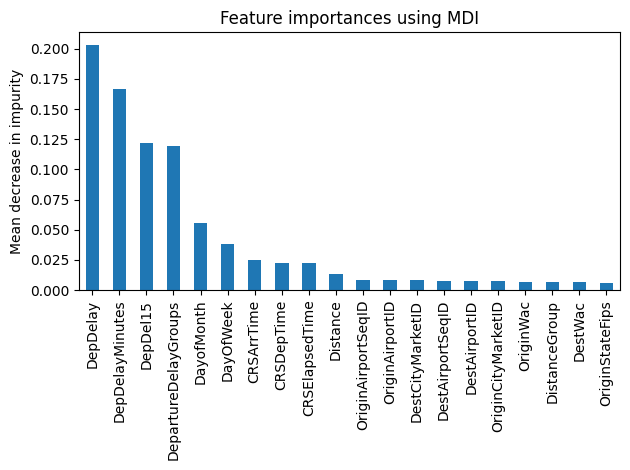

In [ ]:
feature_names = cols
importances = loaded_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in loaded_model.estimators_], axis=0)

# Plot the feature importances of the forest
forest_importances = pd.Series(importances, index=feature_names)
forest_importances = forest_importances.sort_values(ascending = False)[:20]

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### copula

#### base

In [33]:
clf = RandomForestClassifier(n_estimators = 100,max_depth = 300, random_state = 4266,class_weight='balanced')
clf = clf.fit(x_cop, y_cop)

In [ ]:
# save the model to disk
filename = 'Save State/rf_cop.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
# load the model from disk
filename = 'Save State/rf_cop.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [34]:
#load x_val from disk
filename = 'Save State/x_val.pkl'
x_val = pickle.load(open(filename, 'rb'))

#load y_val from disk
filename = 'Save State/y_val.pkl'
y_val = pickle.load(open(filename, 'rb'))

In [35]:
preds = clf.predict(x_val)

In [36]:
print('acc = ' ,accuracy_score(y_val, preds))
print('recall = ',recall_score(y_val,preds))
print('precision = ',precision_score(y_val,preds))
print('f1 = '  ,f1_score(y_val, preds))

acc =  0.914493422570967
recall =  0.4866676072234763
precision =  0.9810864618885097
f1 =  0.6506035458317616


#### beta clean

In [ ]:
clf = RandomForestClassifier(n_estimators = 100,max_depth = 300, random_state = 4266,class_weight='balanced')
clf = clf.fit(x_cop, y_cop)

In [ ]:
#load x_val from disk
filename = 'Save State/x_val.pkl'
x_val = pickle.load(open(filename, 'rb'))

#load y_val from disk
filename = 'Save State/y_val.pkl'
y_val = pickle.load(open(filename, 'rb'))

In [ ]:
preds = clf.predict(x_val)

In [ ]:
print('acc = ' ,accuracy_score(y_val, preds))
print('recall = ',recall_score(y_val,preds))
print('precision = ',precision_score(y_val,preds))
print('f1 = '  ,f1_score(y_val, preds))

acc =  0.9274982690976229
recall =  0.6718397291196389
precision =  0.8537875392200807
f1 =  0.7519639966839052


### CTGAN

#### base

In [ ]:
clf = RandomForestClassifier(n_estimators = 100,max_depth = 300, random_state = 4266,class_weight='balanced')
clf = clf.fit(x_gan, y_gan)

In [ ]:
# save the model to disk
filename = 'Save State/rf_gan.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
# load the model from disk
filename = 'Save State/rf_gan.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
#load x_val from disk
filename = 'Save State/x_val.pkl'
x_val = pickle.load(open(filename, 'rb'))

#load y_val from disk
filename = 'Save State/y_val.pkl'
y_val = pickle.load(open(filename, 'rb'))

In [ ]:
preds = clf.predict(x_val)

In [ ]:
unique, counts = np.unique(y_val, return_counts=True)

dict(zip(unique, counts))

{0.0: 72484, 1.0: 14176}

In [ ]:
unique, counts = np.unique(preds, return_counts=True)

dict(zip(unique, counts))

{0.0: 86660}

In [ ]:
print('acc = ' ,accuracy_score(y_val, preds))
print('recall = ',recall_score(y_val,preds))
print('precision = ',precision_score(y_val,preds))
print('f1 = '  ,f1_score(y_val, preds))

acc =  0.8364181860143088
recall =  0.0
precision =  0.0
f1 =  0.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### fine

In [ ]:
clf = RandomForestClassifier(n_estimators = 100,max_depth = 300, random_state = 4266,class_weight='balanced')
clf = clf.fit(x_gan, y_gan)

In [ ]:
#load x_val from disk
filename = 'Save State/x_val.pkl'
x_val = pickle.load(open(filename, 'rb'))

#load y_val from disk
filename = 'Save State/y_val.pkl'
y_val = pickle.load(open(filename, 'rb'))

In [ ]:
preds = clf.predict(x_val)

In [ ]:
print('acc = ' ,accuracy_score(y_val, preds))
print('recall = ',recall_score(y_val,preds))
print('precision = ',precision_score(y_val,preds))
print('f1 = '  ,f1_score(y_val, preds))

acc =  0.8392684052619432
recall =  0.019116817155756208
precision =  0.9186440677966101
f1 =  0.03745421878239237


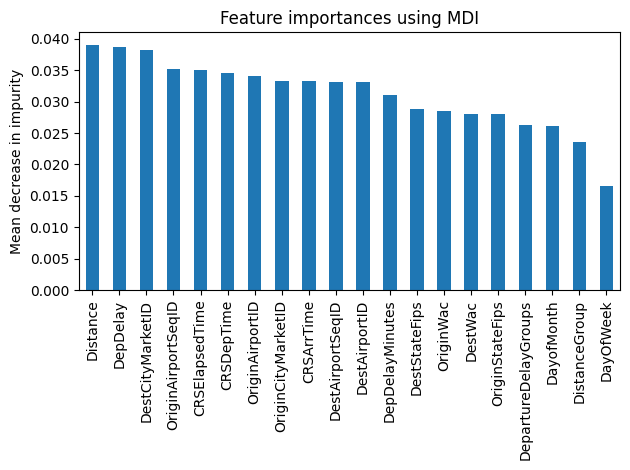

In [ ]:
feature_names = x_gan.columns.tolist()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

# Plot the feature importances of the forest
forest_importances = pd.Series(importances, index=feature_names)
forest_importances = forest_importances.sort_values(ascending = False)[:20]

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### copula + GAN

#### base

In [ ]:
clf = RandomForestClassifier(n_estimators = 100,max_depth = 300, random_state = 4266,class_weight='balanced')
clf = clf.fit(x_cop_gan, y_cop_gan)

In [ ]:
#load x_val from disk
filename = 'Save State/x_val.pkl'
x_val = pickle.load(open(filename, 'rb'))

#load y_val from disk
filename = 'Save State/y_val.pkl'
y_val = pickle.load(open(filename, 'rb'))

In [ ]:
preds = clf.predict(x_val)

In [ ]:
print('acc = ' ,accuracy_score(y_val, preds))
print('recall = ',recall_score(y_val,preds))
print('precision = ',precision_score(y_val,preds))
print('f1 = '  ,f1_score(y_val, preds))

acc =  0.8369836141241634
recall =  0.0037387133182844243
precision =  0.9298245614035088
f1 =  0.007447481205648843


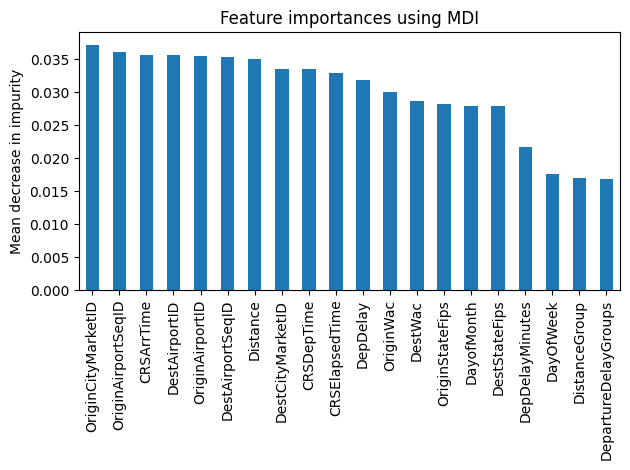

In [ ]:
feature_names = x_cop_gan.columns.tolist()
importances = clf.feature_importances_

# Plot the feature importances of the forest
forest_importances = pd.Series(importances, index=feature_names)
forest_importances = forest_importances.sort_values(ascending = False)[:20]

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### fine tuned

In [ ]:
clf = RandomForestClassifier(n_estimators = 100,max_depth = 300, random_state = 4266,class_weight='balanced')
clf = clf.fit(x_cop_gan, y_cop_gan)

In [ ]:
#load x_val from disk
filename = 'Save State/x_val.pkl'
x_val = pickle.load(open(filename, 'rb'))

#load y_val from disk
filename = 'Save State/y_val.pkl'
y_val = pickle.load(open(filename, 'rb'))

In [ ]:
preds = clf.predict(x_val)

In [ ]:
print('acc = ' ,accuracy_score(y_val, preds))
print('recall = ',recall_score(y_val,preds))
print('precision = ',precision_score(y_val,preds))
print('f1 = '  ,f1_score(y_val, preds))

acc =  0.9114931917839834
recall =  0.6848899548532731
precision =  0.7519361833952912
f1 =  0.7168487891317188


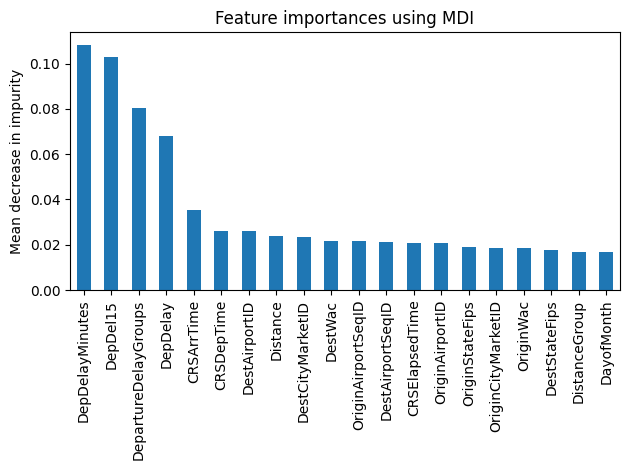

In [ ]:
feature_names = x_cop_gan.columns.tolist()
importances = clf.feature_importances_

# Plot the feature importances of the forest
forest_importances = pd.Series(importances, index=feature_names)
forest_importances = forest_importances.sort_values(ascending = False)[:20]

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()